In [20]:
import jieba
import jieba.analyse

import pandas as pd
import numpy as np
from collections import Counter # 次數統計

import plotly.express as px #做圖需要

import networkx as nx
import matplotlib.pyplot as plt
from tkinter import _flatten

In [2]:
#讀取古龍及金庸小說文字檔案
lee = pd.read_csv('/Users/anderson/Desktop/Data Science/GitHub/PL-Repo/02_Homework/HW3/gulong_leeknife_sort.csv')
cheros = pd.read_csv('/Users/anderson/Desktop/Data Science/GitHub/PL-Repo/02_Homework/HW3/jy_c_heroes_sort.csv')

In [3]:
#參數及環境設定
dictfile = "/Users/anderson/Desktop/Data Science/dict.txt"  # 字典檔
stopfile = "/Users/anderson/Desktop/Data Science/GitHub/PL-Repo/02_Homework/HW4&5/stopword_1.txt"  # stopwords
fontpath = "/Users/anderson/Library/Group Containers/UBF8T346G9.Office/FontCache/4/CloudFonts/TTC/82731638364.ttc"  # 字型檔
jieba.set_dictionary(dictfile)
jieba.analyse.set_stop_words(stopfile)

In [12]:
#進行關鍵字提取
lee_tags = []
lee_test = ""
for i in range(0,89):
    text = lee["text"][i]
    tags = jieba.analyse.extract_tags(text, topK=20)
    for j in range(0,len(tags)):
        lee_test = lee_test + tags[j] + ' '
    lee_tags.append(lee_test)

lee["tags"] = lee_tags
lee.head()

,Unnamed: 0,ch,text,tags
0,0,1,冷風如刀，以大地為砧板，視眾生為魚肉。萬裏飛雪，將蒼穹作洪爐，溶萬物為白銀。雪將住，風未定...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
1,2,2,馬車裏堆著好幾壇酒，這酒是那少年買的，所以他一碗又一碗地喝著，而且喝得很快。李尋歡瞧著他，...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
2,4,3,李尋歡再一注視，那查猛的咽喉，竟已被洞穿！殺他的人顯然不願他的鮮血濺上自己的衣裳，所以一劍...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
3,6,4,孫逵笑道：“你懂得什麽？我若能將梅花盜置之於死地，非但從此揚眉吐氣，而且……而且那好處也不...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
4,1,5,李尋歡抓起酒壺，將剩下來的酒全都灌了下去，然後就不停地咳嗽，蒼白的臉上又現出淒豔的血紅色。...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...


In [38]:
#!pip install -U scikit-learn
# 如果沒有安裝scikit-learn可以執行上面公式安裝
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

docs = lee['tags'].tolist()
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [39]:
coocc = df.T.dot(df)
coocc.head()

,一個,一劍,一戰,一條,一樣,一碟,一種,一聲,一間,一陣,...,黃衣,黑衣人,點頭,黯然,龍嘯,龍嘯雲笑,龍嘯雲道,龍小,龍小雲道,龍鳳
一個,108744,6500,2336,2393,5867,2446,4033,21487,2178,2657,...,1757,6621,1987,2336,29663,2663,4576,7692,3695,1396
一劍,6500,403,143,146,351,149,240,1304,129,166,...,96,398,115,143,1774,167,271,450,211,81
一戰,2336,143,57,57,129,57,91,487,50,57,...,32,154,43,57,614,57,97,164,74,27
一條,2393,146,57,60,132,60,91,503,50,60,...,32,157,43,57,632,60,100,165,74,27
一樣,5867,351,129,132,329,135,215,1177,117,147,...,94,358,103,129,1588,147,247,402,189,71


In [40]:
coocc_total = pd.DataFrame(columns = coocc.columns, index=['sum'])
for i in coocc:
    coocc_total.iloc[0][i] = int(coocc[i].sum())
coocc_total

,一個,一劍,一戰,一條,一樣,一碟,一種,一聲,一間,一陣,...,黃衣,黑衣人,點頭,黯然,龍嘯,龍嘯雲笑,龍嘯雲道,龍小,龍小雲道,龍鳳
sum,3222700,193080,69540,71400,174340,73080,119280,639400,64500,79200,...,51660,196580,58480,69540,878340,79380,135520,226760,108400,41040


In [41]:
result = coocc_total.values.flatten()
print(np.mean(result),np.std(result))
a = 0
for i in range(0,len(result)):
    if result[i] > 2500:
        a = a + 1
print(a)

214800.0 464119.58138083725
441


In [46]:
df_new = pd.DataFrame()
for i in coocc_total.columns:
    if coocc_total[i]['sum'] > 5000:
        df_new[i] = df[i]

coocc_new = df_new.T.dot(df_new)
coocc_new.head()

/var/folders/k_/2r9gfk5j0fbc0l7wptv_v2jc0000gn/T/ipykernel_39364/3658264111.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



,一個,一劍,一戰,一條,一樣,一碟,一種,一聲,一間,一陣,...,黃衣,黑衣人,點頭,黯然,龍嘯,龍嘯雲笑,龍嘯雲道,龍小,龍小雲道,龍鳳
一個,108744,6500,2336,2393,5867,2446,4033,21487,2178,2657,...,1757,6621,1987,2336,29663,2663,4576,7692,3695,1396
一劍,6500,403,143,146,351,149,240,1304,129,166,...,96,398,115,143,1774,167,271,450,211,81
一戰,2336,143,57,57,129,57,91,487,50,57,...,32,154,43,57,614,57,97,164,74,27
一條,2393,146,57,60,132,60,91,503,50,60,...,32,157,43,57,632,60,100,165,74,27
一樣,5867,351,129,132,329,135,215,1177,117,147,...,94,358,103,129,1588,147,247,402,189,71


In [45]:
fig = px.imshow(coocc_new)
fig.layout.height = 1000
fig.layout.width = 1000
#fig.show()

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 19968 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 20491 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 21133 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 25136 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 26781 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 27171 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 30879 missing from current font.

/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 36686 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 36782 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 36861 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 36452 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 36865 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 36889 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 20123 missing from current font.

/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 19968 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 20491 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 21133 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 25136 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 26781 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 27171 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 30879 missing from current font.

/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 30631 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 30693 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 30772 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 32187 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 31206 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 23389 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 20736 missing from current font.

/opt/anaconda3/lib/p

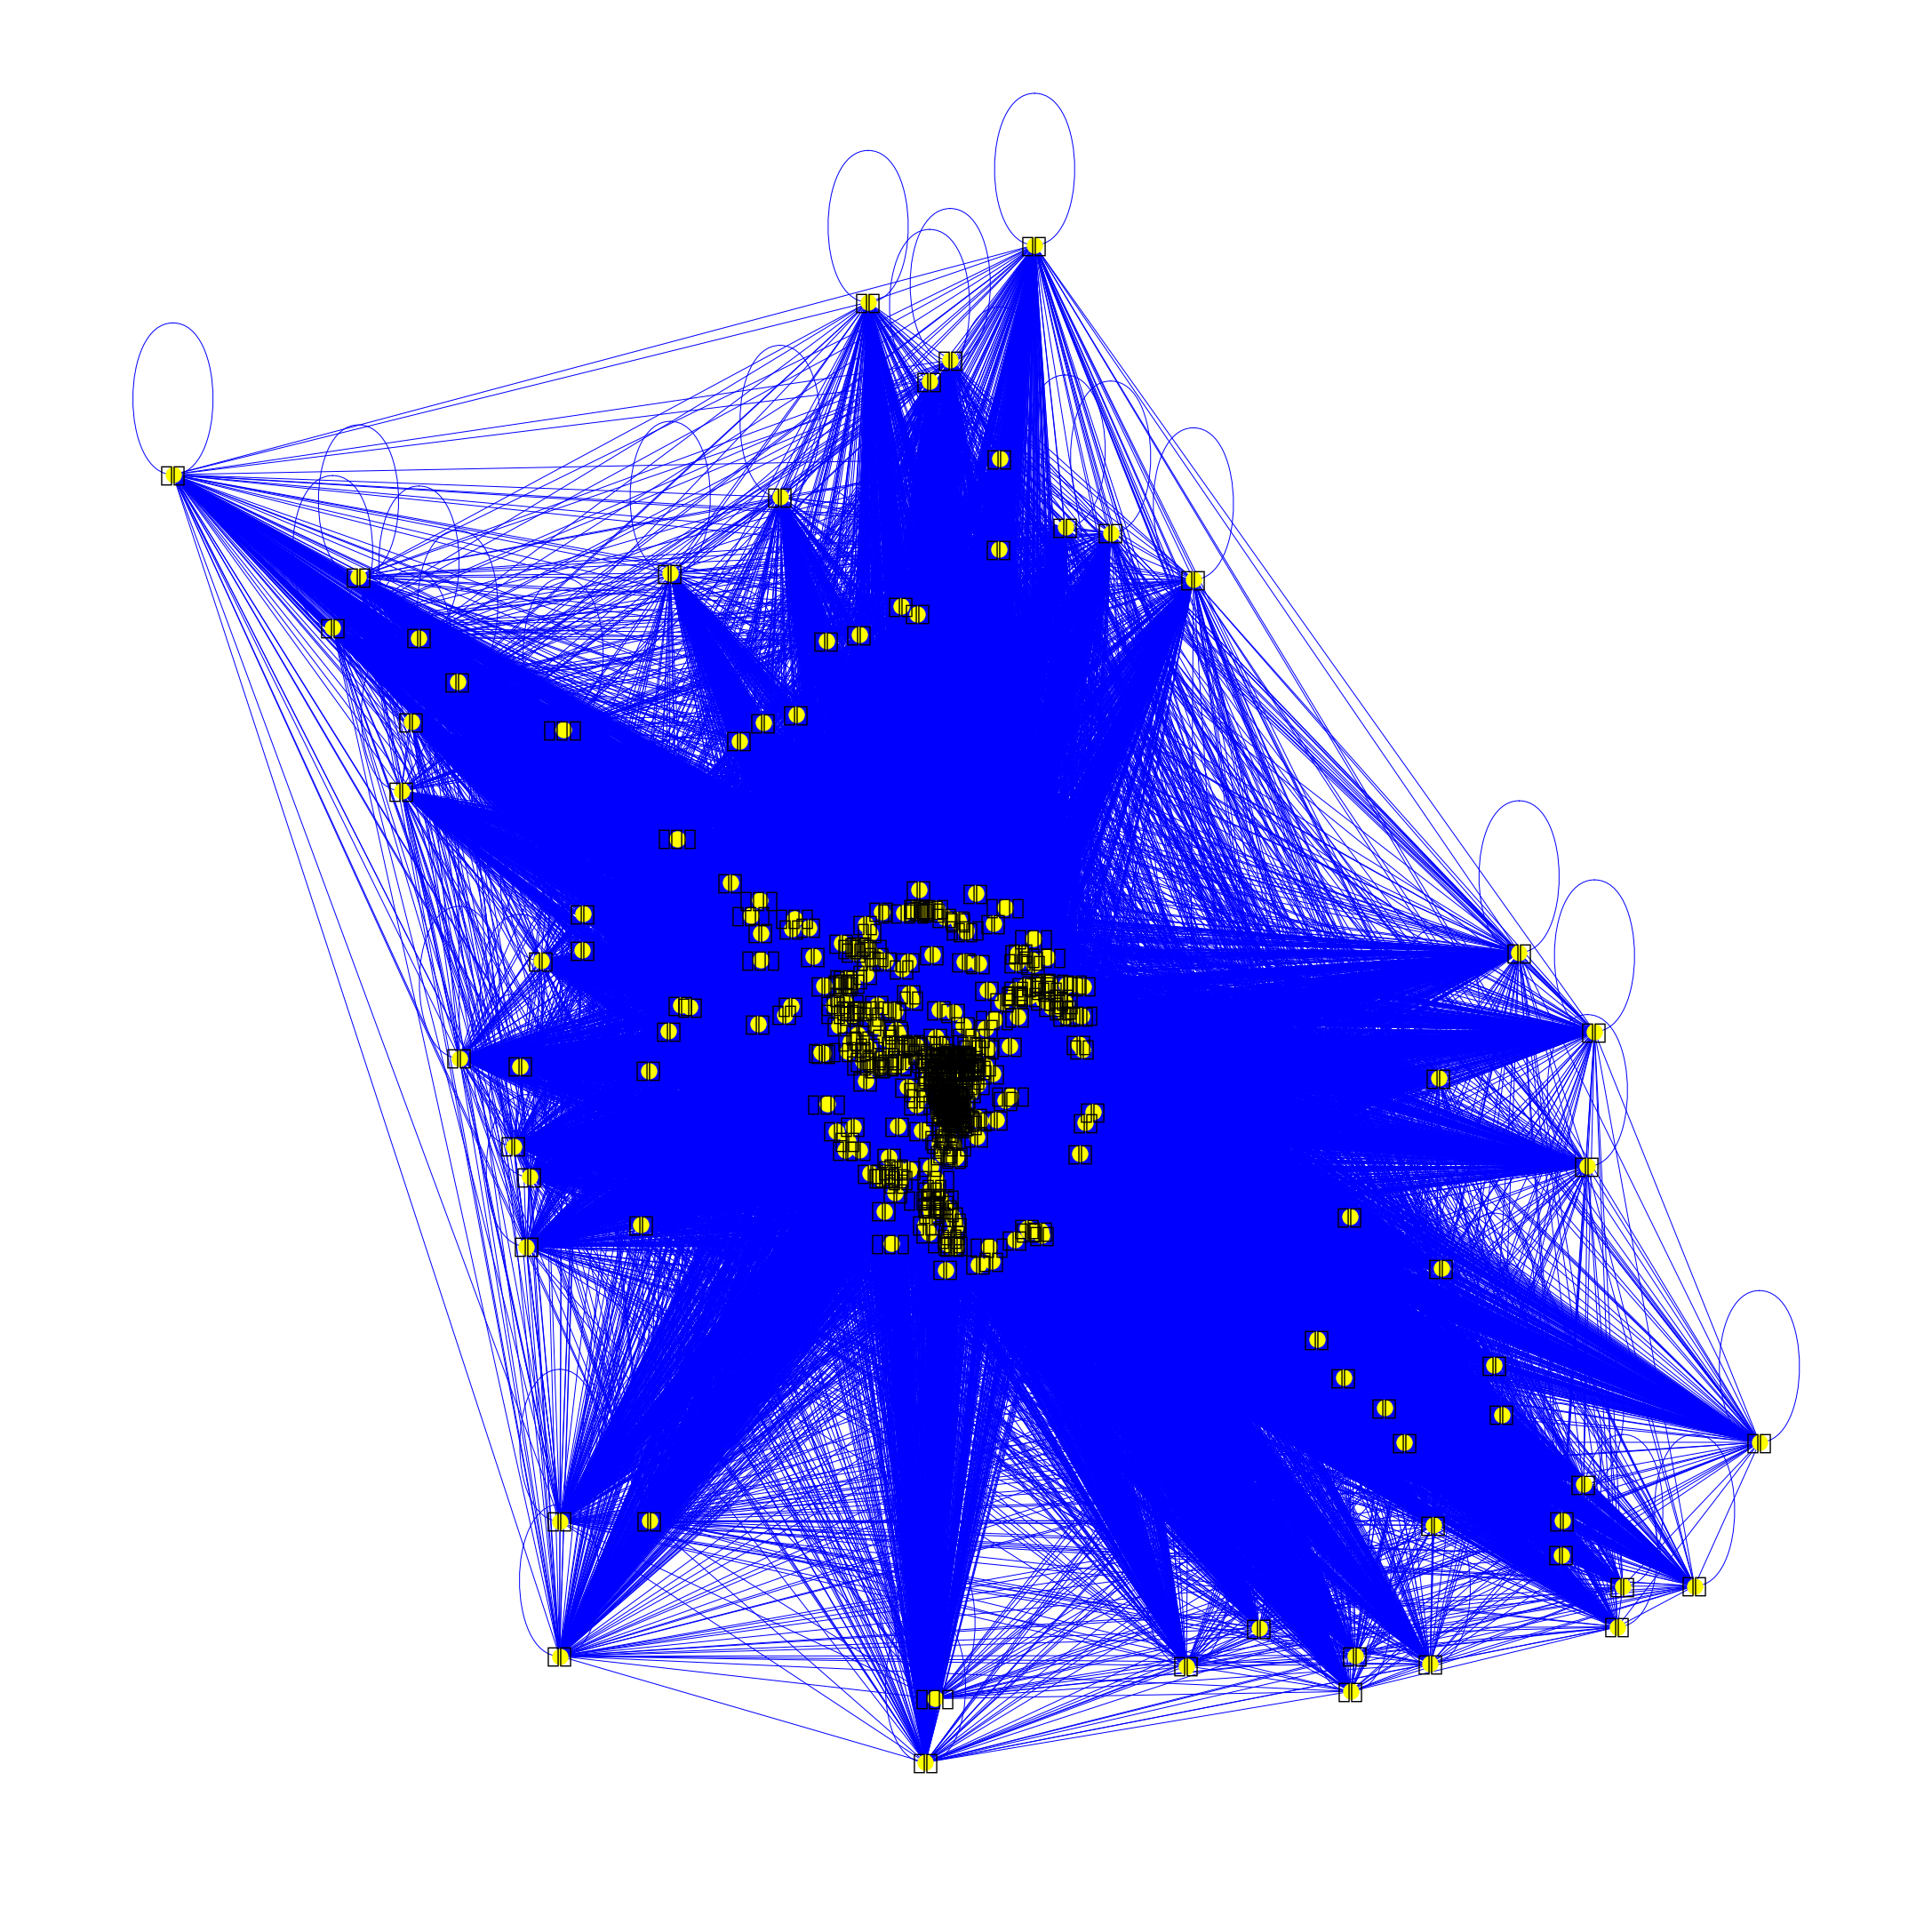

In [44]:
plt.figure(figsize = (30,30))
graph1 = nx.from_pandas_adjacency(coocc_new)
nx.draw(graph1, with_labels = True, node_color = 'yellow', font_size = 25, edge_color = 'blue')

In [ ]:
plt.savefig('共現圖.jpg')